There are two data generators as below:
             a) Guassian Quantiles 
             b) Make_classification
  

GAUSSIAN QUANTILES


In [161]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_gaussian_quantiles 
import pandas as pd
x,y=make_gaussian_quantiles(cov=2,n_samples=1000,n_classes=2,n_features=2,random_state=1)
#If you are aware of gaussian distribution, it takes the data that way. It assumes the correlation between the n_features you assigned.
df=pd.DataFrame(x)
y1=pd.Series(y)
df.head(7)
#The below shows the data dispersed between the features

,0,1
0,-1.140108,0.069384
1,1.533599,-0.155701
2,-1.559834,1.074086
3,1.239134,0.174310
4,-2.794104,-0.832874
5,1.600366,2.149346
6,-1.794438,2.487261


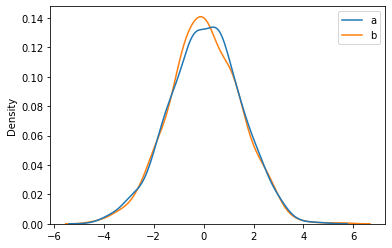

In [162]:
#PDF's for the features
import seaborn as sns
x1=pd.DataFrame(x,columns=['a','b'])
sns.kdeplot(data=x1)

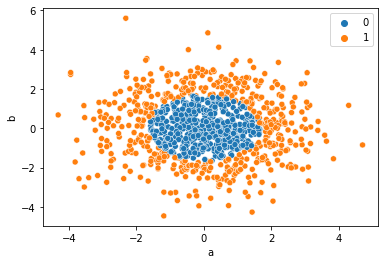

In [163]:
#Lets visualise it more better

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vis_obj=TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
vis_obj.fit_transform(x1)
sns.scatterplot(x1.iloc[:,0],x1.iloc[:,1],hue=y1)
plt.show()


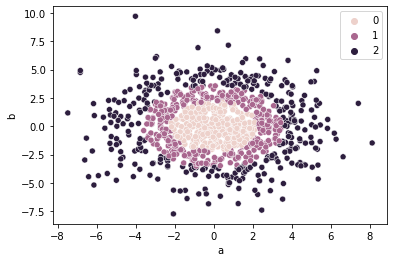

In [164]:
#Now lets add more classes and see the gaussian quantile visually
xz,yz=make_gaussian_quantiles(cov=6,n_samples=1000,n_features=2,n_classes=3,random_state=1)
xz1=pd.DataFrame(xz,columns=['a','b'])
yz1=pd.Series(yz)
vis_obj=TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
vis_obj.fit_transform(xz1)
sns.scatterplot(xz1.iloc[:,0],xz1.iloc[:,1],hue=yz1)
plt.show()

COMBINING THE ABOVE TWO GAUSSIAN QUANTILES

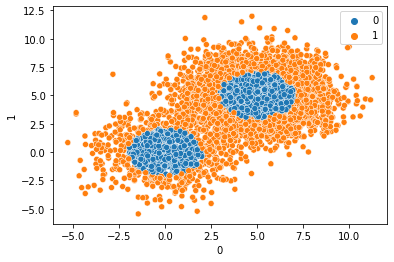

In [165]:
import numpy as np
#Gaussian 1
xz,yz=make_gaussian_quantiles(cov=3,n_samples=1000,n_features=2,n_classes=2,random_state=1)
xz1=pd.DataFrame(xz,columns=['a','b'])
yz1=pd.Series(yz)


#Gaussian 2: Locating at mean= 5.This critically displaces the quantile.
x,y=make_gaussian_quantiles(mean=(5,5),cov=3,n_samples=5000,n_features=2,n_classes=2,random_state=1)
x1=pd.DataFrame(x,columns=['a','b'])
y1=pd.Series(y)

#Concatenate above Gaussians
X = pd.DataFrame(np.concatenate((x1,xz1)))
Y = pd.Series(np.concatenate((y1,yz1)))
vis_obj=TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
vis_obj.fit_transform(X)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y)
plt.show()

MAKE_CLASSIFICATION

POINTS TO PONDER:
          
          1) make_classification can help us adding noise by adding random classes
          
          2) It helps to easy the classification by using class seperators
          
          3) You can also adjust the redundant features and compare the sensitivity of ML algorithms
          
          4) n_informative is the dimension or the number of features through which your cluster is weighted or defined. These features linerly combine to form a cluster




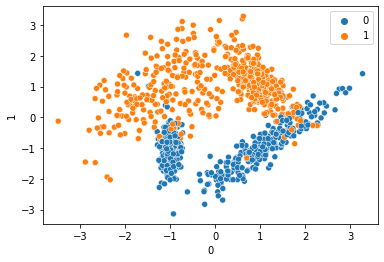

In [167]:
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0)
X = pd.DataFrame(x)
Y = pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.6,n_iter=400,random_state=47)
vis_obj.fit_transform(X)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y) 
plt.show()

Lets add Noise to the data

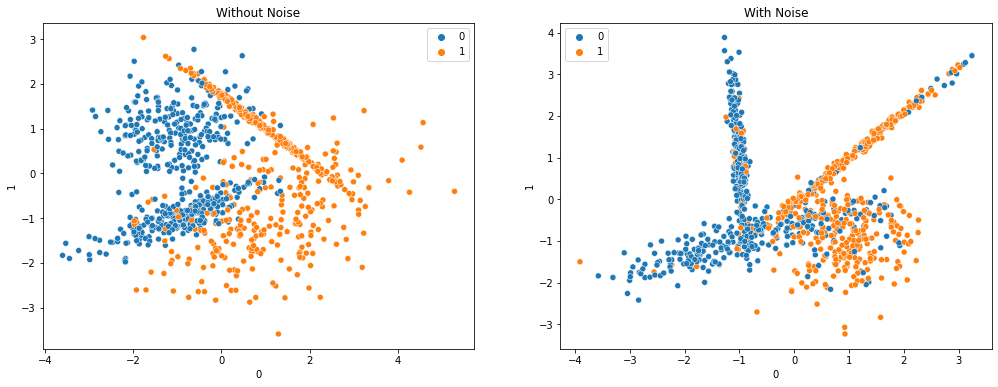

In [168]:
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0)
X = pd.DataFrame(x)
Y = pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.6,n_iter=400,random_state=47)
vis_obj.fit_transform(X)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax1) 
ax1.set_title('Without Noise')


#Noise data
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0,flip_y=0.2)
X = pd.DataFrame(x)
Y = pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.6,n_iter=400,random_state=47)
vis_obj.fit_transform(X)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax2) 
ax2.set_title('With Noise')
plt.show()

#Noise data is hard to classify, so you can see some regions classes overlap

DEALING WITH BALANCED DATASET AND UNBALANCED DATASET 

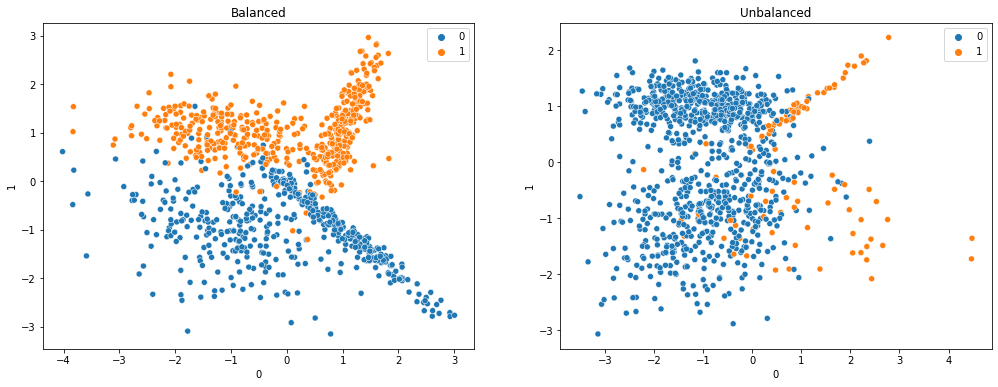

In [169]:
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0,weights=[0.5,0.5])#50% each class
X = pd.DataFrame(x)
Y = pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.6,n_iter=400,random_state=47)
vis_obj.fit_transform(X)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax1) 
ax1.set_title('Balanced')


#Unbalanced data
from sklearn.datasets import make_classification
import seaborn as sns
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0,weights=[0.9,0.1])# 90% one class, 10% another class
X = pd.DataFrame(x)
Y = pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.6,n_iter=400,random_state=47)
vis_obj.fit_transform(X)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax2) 
ax2.set_title('Unbalanced')
plt.show()


DEALING WITH REDUNDANT FEATURES

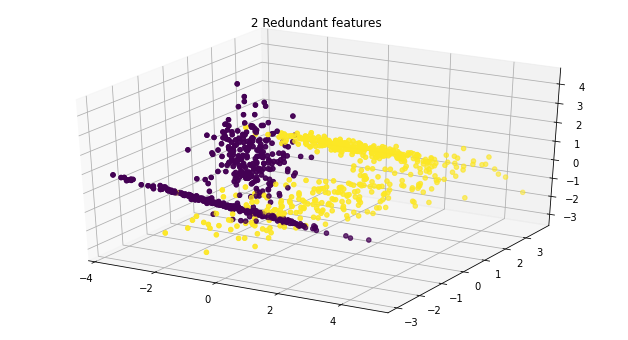

In [170]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_classes=2,n_features=4,n_redundant=2)
X=pd.DataFrame(x)
Y=pd.Series(y)
f,ax1=plt.subplots(nrows=1,ncols=2,figsize=(11,6))
ax1 = plt.axes(projection ="3d")
for i in Y.unique():
  ax1.scatter3D(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=Y)# the color comes out with the binary class 
ax1.set_title(' 2 Redundant features')

plt.show()
#Redundant features degrade the performance and will be difficult to classify

IF WE NEED THE CLASSES TO BE WELL SEPERATED

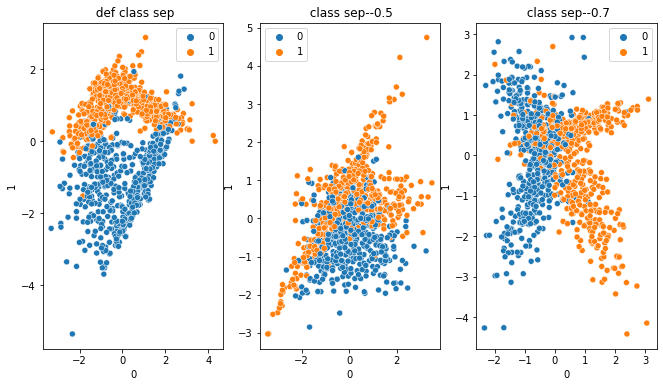

In [175]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0)
X=pd.DataFrame(x)
Y=pd.Series(y)
f,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(11,6))

sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax1)# the color comes out with the binary class 
ax1.set_title(' def class sep')

#With class seperator as 0.5
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0,class_sep=0.5)
X=pd.DataFrame(x)
Y=pd.Series(y)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax2)# the color comes out with the binary class 
ax2.set_title(' class sep--0.5')


#With class seperator as 0.7
x,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_redundant=0,class_sep=0.7)
X=pd.DataFrame(x)
Y=pd.Series(y)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=Y,ax=ax3)# the color comes out with the binary class 
ax3.set_title(' class sep--0.7')
plt.show()
#easy classification for high class seperator 

n_clusters per class

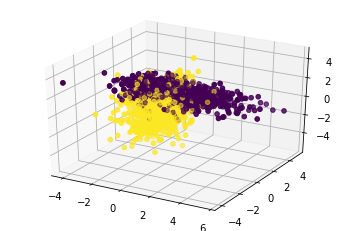

<Figure size 5040x792 with 0 Axes>

In [176]:
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d
x,y=make_classification(n_samples=2000,n_classes=2,n_clusters_per_class=2,n_features=4,n_redundant=0,n_informative=4)
X=pd.DataFrame(x);Y=pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.7,random_state=47)
vis_obj.fit_transform(X)
ax = plt.axes(projection ="3d")
for i in Y.unique():
  ax.scatter3D(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=Y)
plt.figure(figsize=(70,11))
plt.show()

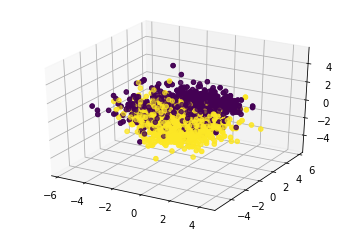

<Figure size 5040x792 with 0 Axes>

In [180]:
#No Of Clusters taken as 3
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d
x,y=make_classification(n_samples=2000,n_classes=2,n_clusters_per_class=3,n_features=4,n_redundant=0,n_informative=4)
X=pd.DataFrame(x);Y=pd.Series(y)
vis_obj=TSNE(n_components=2,angle=0.7,random_state=47)
vis_obj.fit_transform(X)
ax = plt.axes(projection ="3d")
for i in Y.unique():
  ax.scatter3D(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=Y)
plt.figure(figsize=(70,11))
plt.show()